In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline

# What is Bootstrapping?

To understand bootstrapping, let's work though an easy example. We roll a six-sided die 50 times and calculate the mean.

In [2]:
possible_rolls = np.arange(1,7)
num_rolls = 50
sample_rolls = np.random.choice(possible_rolls, num_rolls)
avg_roll = np.mean(sample_rolls)
print(f"The average of {num_rolls} is {avg_roll}")

The average of 50 is 3.26


## What is the 95% confidence interval?

We have an average based on our sample of 50 rolls, but we know that this is only approximate. To find the true average, we would have to average millions of rolls. How good is an estimate based on a sample size of 50?

One way to answer this would be to take many, many samples of 50 and look at the distribution of means. Let's try that.

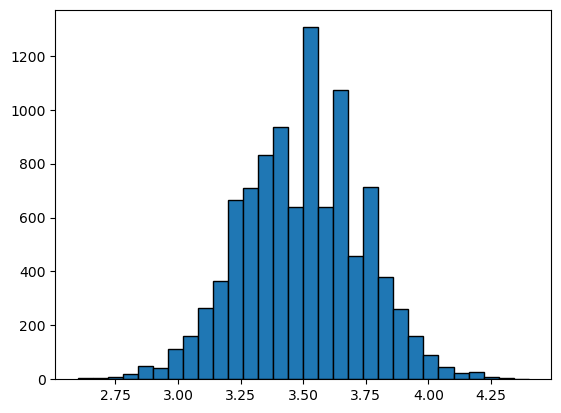

In [3]:
means = []
for i in np.arange(10000):
    sample_rolls = np.random.choice(possible_rolls, num_rolls)
    avg_roll = np.mean(sample_rolls)
    means.append(avg_roll)

plt.hist(means, bins=30);

To find the 95% confidence interval, we just figure out the interval that contains 95% our our results. The datascience module has a handy function for this: `percentile.` The 95% confidence interval would be all the value above the bottom 2.5% and below the top 2.5%.

In [4]:
left = percentile(2.5, means)
right = percentile(97.5, means)
print(f"The 95% confidence interval ranges from {left} to {right}")

The 95% confidence interval ranges from 3.02 to 3.96


So we have an estimate of the mean based on 50 rolls and we are 95% confident that the true mean lies within this range.

**But in the real world we cannot replicate our experiment thousands of times!** 

So, if we only have the one sample of 50, how do we estimate a confidence interval for the mean?

Pay close attention, but this is where the magic happens. First, we assume that the sample we have is a reasonable reflection of the true population as a whole. So instead of generating another new set of data by rolling the die again, or by performing the experiment again, **we sample from our sample.**  In this case, we draw 50 rolls, with replacement after each draw, to create a new sample of 50. We calculate the mean of this new sample. We do this again and again, to get a distribution of means based on our sample.

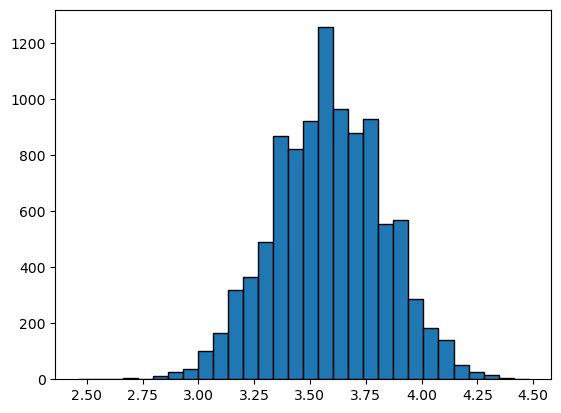

In [5]:
bootstrap_means = []
for i in np.arange(10000):
    bootstrap_sample = np.random.choice(sample_rolls, size=num_rolls, replace=True)
    avg_roll = np.mean(bootstrap_sample)
    bootstrap_means.append(avg_roll)

plt.hist(bootstrap_means, bins=30);

In [6]:
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)
print(f"The 95% confidence interval based on bootstrapping ranges from {left} to {right}")

The 95% confidence interval based on bootstrapping ranges from 3.1 to 4.06


This confidence interval is **very close** to the estimate we got replicating the experiment thousands of times without actually collecting any new data.

## Estimating height

Let's look at another example that is closer to how you will actually use the bootstrap in practice. We will try to estimate of the confidence interval for the mean of a sample from the height dataset we have worked with previously.

In [6]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

First, load the height and weight dataset.

In [13]:
population = Table.read_table("./data/weight-height.csv")
population.show(5)

Gender,Height,Weight
Male,73.847,241.894
Male,68.7819,162.31
Male,74.1101,212.741
Male,71.731,220.042
Male,69.8818,206.35


We can calculate the mean population height by taking just that column and applying the mean function. We won't do further calculations with the population mean here, but it is a helpful reference point.

In [14]:
pop_mean = np.mean(population.column("Height"))
print(f'Population mean: {pop_mean:.2f} cm')

Population mean: 66.37 cm


That's great, now we know the true population mean for the data provided. However, let's imagine we only have a single sample of 10 people.

In [ ]:
pop_ht = population.select("Height")
pop_sample = pop_ht.sample(10)
pop_sample

Height
62.4441
70.3525
69.6637
67.9664
63.0712
62.9219
70.951
69.3822
58.0871
55.9792


We can calculate the sample mean the same way we calculated the population mean:

In [16]:
sample_mean = np.mean(pop_sample.column("Height"))
print(f'Sample mean: {sample_mean:.2f} cm')

Sample mean: 65.52 cm


Notice that the samoe mean is different from the population mean. But how close is it likely to be? We could do what we have done in the past, and take many new samples and calculate their means, but often when working with real data you will only have one sample. So instead, we resample from that original sample with replacement, and repeat to build up the distribution of resampled means. This is the bootstrap approach. Why does this work? Because the distribition of a sufficiently large random sample should look like the distribution of the population. Each iteration the steps are:

- resample the existing sample with replacement
- Calculate the new sample mean
- Save mean to list

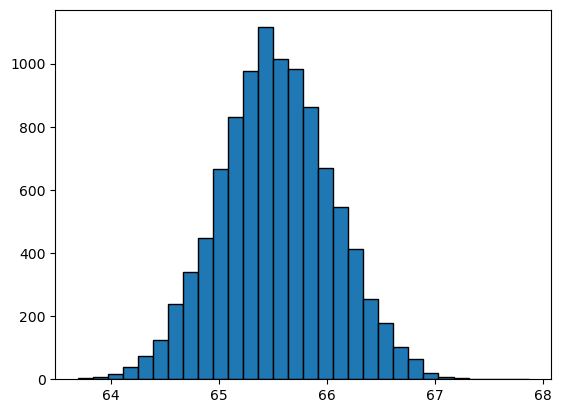

In [ ]:
bootstrap_means = []
for i in np.arange(10000):
    bootstrap_sample = pop_sample.sample()
    sample_avg = np.mean(bootstrap_sample.column("Height"))
    bootstrap_means.append(sample_avg)

plt.hist(bootstrap_means, bins=30);

## Student Challenge 1

Now we are ready to find our bootstrapped confidence interval. Calculate the 95% confidence interval for the sample mean from the above distribution.
(Hint: Look at how this was done in the die roll example above)

In [ ]:
left = ...
right = ...
print(f"The 95% confidence interval based on bootstrapping ranges from {left} to {right}")

## Student Challenge 2

Now imagine we received some more funding and measured many more people's heights. Find the confidence interval based on a new sample of 500 people (50x as large as our previous). What do you notice about this confidence interval? How does this relate to previous concepts we have covered in this course?

In [24]:
pop_sample_500 = pop_ht.sample(500)
pop_sample_500

Height
73.281
70.4783
69.1198
67.2528
69.9208
65.8201
63.3818
63.8423
67.463
72.0882


In [ ]:
bootstrap_means = []
for i in np.arange(10000):
    bootstrap_sample = ...
    sample_avg = ...
    bootstrap_means.append(sample_avg)

plt.hist(bootstrap_means, bins=30);

In [ ]:
left = ...
right = ...
print(f"The 95% confidence interval based on bootstrapping ranges from {left} to {right}")

## Student Challenge 3

This seems to work nicely! We have arrived at an estimate of the uncertainty in our sample mean with only one sample. But beware, bootstrapping is not perfect. Based on what you've seen from how the approach works, what assumptions underlie bootstrapping? Can you think of cases where it won't work?